In [1]:
from preprocess import Preprocess
from kmeans import KMeansClustering
from lda import LDA
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
data = Preprocess.open_pickle("F:\Development\smart_rejector_for_hate_speech\/twitter_data.pkl")
filtered_data = Preprocess.filter_waseem_hovy(X=data, label='racism')
tweets = [x['text'] for x in filtered_data]
cleaned_data = Preprocess.clean(X=tweets)
km = KMeansClustering()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)

INFO:root:Original data length: 16089
INFO:root:After applying filters: 1937
INFO:root:Data length after removing invalid tweets: 47
INFO:root:Explained variance of the SVD step: 100%


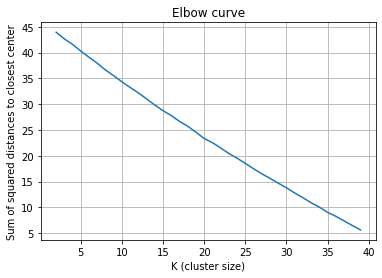

In [3]:
%matplotlib inline
km.plot_elbow_curve(max_k=40, X=X)

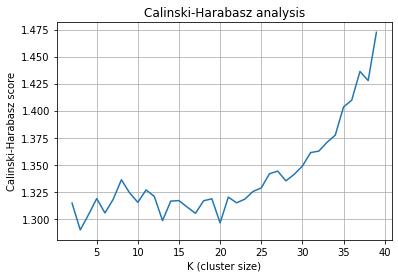

In [4]:
%matplotlib inline
# Higher values are better, when clusters are dense and well separated
km.plot_calinski_harabasz_analysis(max_k=40, X=X)

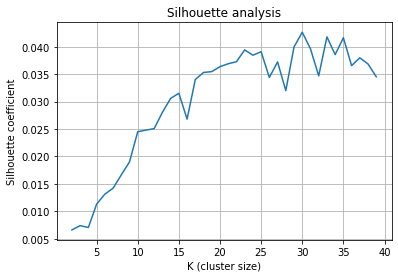

In [5]:
%matplotlib inline
# Higher values are better
km.plot_silhouette_analysis(max_k=40, X=X)

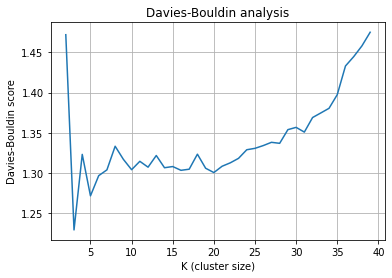

In [6]:
%matplotlib inline
# Values close to zero indicate a better partition
km.plot_davies_bouldin_score_analysis(max_k=40, X=X)

In [7]:
K = 5
km.cluster(X= X, K=K)
km.print_top_terms()

Cluster 0:
 muslims religion terrorist work groups islam girls buddhists designed election

Cluster 1:
 barbarity journalists isis paid greece loan certain money intersecting clerics

Cluster 2:
 speech freedom problem long free avoiding violence make real course

Cluster 3:
 prophet mohammed mosul year old people big trench pedophile isis

Cluster 4:
 shia militia like isis death getting beat peshmerga watching hatred



In [8]:
km.cluster(X= X, K=K)
km.print_most_representative_samples(original_data=filtered_data, X=X, num_samples=5)

Cluster 0: most representative sample indices: [ 2 45 34 40  7]
{'text': 'after watching the shia militia beat a peshmerga to death ,  i have concluded that they are animals ,  just like isis. #islam #iraq #kobane', 'label': 'racism'}

{'text': 'watching shia militia beat a peshmerga to death ,  i thought ,  "praying to allah 5 times a day certainly peaks the level of fanatical hatred"', 'label': 'racism'}

{'text': 'if someone is going to die getting isis out of #tikrit ,  it may as well be the shia militia.  that is all good.  #islam #daesh', 'label': 'racism'}

{'text': 'isis or shia militia - both use islam as their organizing principle. regardless of who wins ,  the outcome will be an evil regime. #tikrit', 'label': 'racism'}

{'text': 'following the example of the pedophile prophet mohammed in every detail ,  one isis militant is marrying a 7 year old child in mosul. #islam', 'label': 'racism'}


Cluster 1: most representative sample indices: [32  8 38 27  0]
{'text': 'saudi cler

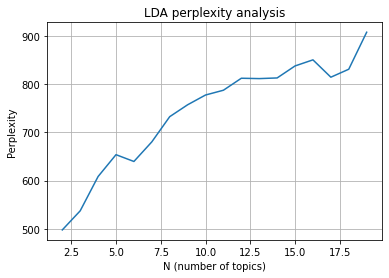

In [9]:
lda = LDA()
X = lda.fit_tf(X=cleaned_data)
# Lower values are better
# Perplexity indicates how well the probability model predicts the samples
lda.plot_perplexity(max_n=20, X=X)

In [16]:
pred = lda.fit_lda(X=X, n_components=10)
lda.print_top_terms()

Topic:  0
['old', 'year', 'prophet', 'mosul', 'mohammed', 'pedophile', 'isis', 'marrying', 'following', 'example']
Topic:  1
['journalists', 'non', 'muslim', 'big', 'long', 'women', 'watch', 'tired', 'cliche', 'cage']
Topic:  2
['election', 'people', 'terrorist', 'real', 'group', 'prophet', 'man', 'mohammed', 'time', 'hamas']
Topic:  3
['islam', 'paris', 'does', 'murder', 'designed', 'excuses', 'muslims', 'getting', 'simply', 'bigotry']
Topic:  4
['allah', 'level', 'day', 'militia', 'hatred', 'hands', 'need', 'shia', 'buddhists', 'watching']
Topic:  5
['isis', 'muslims', 'speech', 'barbarity', 'years', 'good', 'girls', 'killing', 'islam', 'shia']
Topic:  6
['islam', 'religion', 'jihad', 'work', 'terrorist', 'saudi', 'cleric', 'sun', 'earth', 'loot']
Topic:  7
['murder', 'problem', 'trench', 'isis', 'quran', 'free', 'battles', 'medina', 'trick', 'trying']
Topic:  8
['death', 'militia', 'shia', 'like', 'just', 'media', 'watching', 'peshmerga', 'beat', 'cult']
Topic:  9
['speech', 'freedo